<a href="https://colab.research.google.com/github/janespino24/PhDinDS/blob/main/ElFarol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El Farol Bar Problem - Modeling Exercise

Following are three potential models to the classic El Farol (EF) Bar Problem.
Key Assumptions:
1. 100 potential bar goers in the city
2. 50% chance initial (random) chance a person wants to go in a certain day
3. Ideal attendance is 60 for maximum enjoyment
4. When someone decides to go, he will go and enter and stay no matter the "scene" he encounters
5. Everyone comes in and stay for roughly the same time
6. Events are weekly, once a week - so no "seasonal" factor (i.e. weekdays vs weekends)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Model 1 - No memory, purely random decision by each person every week

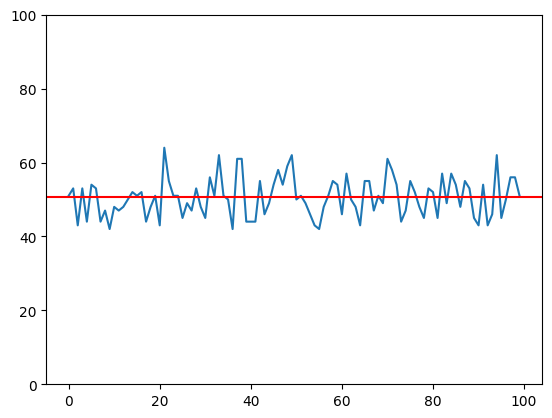

In [ ]:
x = 100  # length of time series
y = 100 # of people in city
ideal = 60 # attendance to produce maximum enjoyment
attendance = [] # number of people going to EF at day x
interest = [] # interest level of each person to go to EF

for i in range(x):
    interest = np.random.rand(y)  # generate random number from 0 to 1
    count = (interest > 0.5).sum()  # select and count people who will attend
    attendance.append(count)        # add count on day i

#plot the attendance and the average line
attendance = pd.Series(attendance)
attendance.plot()
plt.ylim(0, 100)
plt.axhline(y=attendance.mean(), color='red');

# Model 2 - With interest boost of 10% if attended last week, plus random

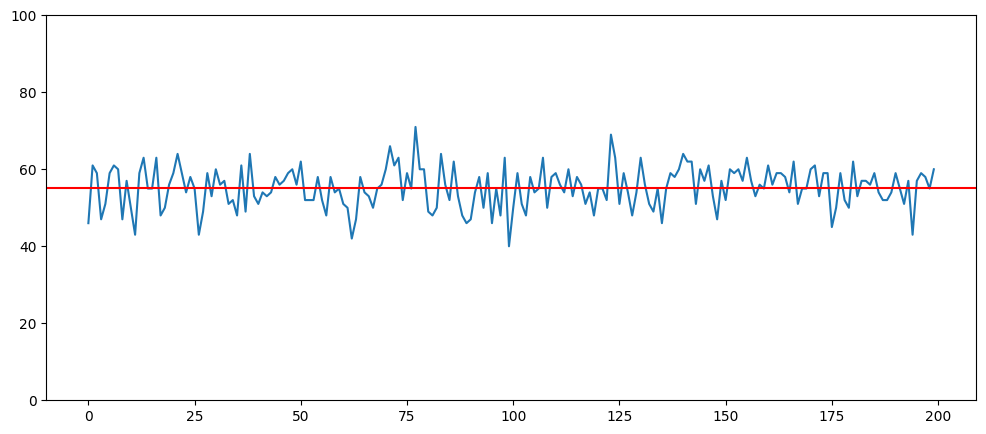

In [ ]:
x = 200  # length of time series
y = 100 # of people in city
ideal = 60 # attendance to produce maximum enjoyment
attended = [] #0 or 1 if person attended, weekly
attendance = [] # number of people going to EF at day x
interest = [] # interest level of each person to go to EF
gain = 0.1 # 10% interest boost if attended last week

interest = np.random.rand(y)  # generate random number from 0 to 1 for initial interest level
for i in range(x):
    count = (interest > 0.5) # select people who will attend
    attended.append(count) # add attendance record of day i to the matrix
    attendance.append(count.sum())  # count attendance at day i and add to list
    interest = np.random.rand(100)  # generate random component of interest for next week
    interest = interest + attended[i]*gain   # add boost if attended


#plot the attendance and the average line
plt.figure(figsize=(12,5))
attendance = pd.Series(attendance)
attendance.plot()
plt.ylim(0, 100)
plt.axhline(y=attendance.mean(), color='red');

# Model 3 - With memory (pleasant or unpleasant) for those who attended the previous week, plus random

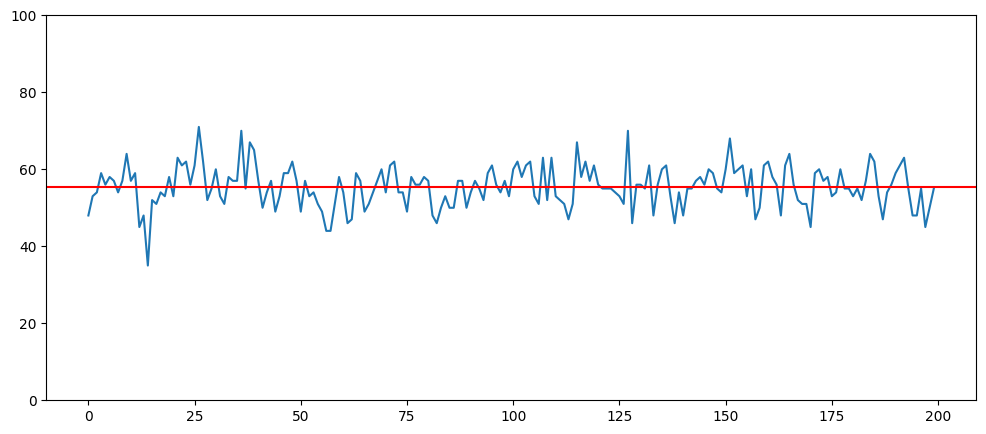

In [ ]:
x = 200  # length of time series
y = 100 # of people in city
ideal = 60 # attendance to produce maximum enjoyment
attended = [] #0 or 1 if person attended, weekly
attendance = [] # number of people going to EF at day x
interest = [] # interest level of each person to go to EF
impact = []  # -1 to 1, based on attendance vs ideal capacity. The bigger absolute diff between the two, the lower the impact score
gain = 0.15  # combined with impact, will add or subtract from interest level for the coming week

def comp_impact(num):
    if 0 <= num <= 60:
        return (num/20) - 2 # linear increase -2 to 1
    elif 60 < num <= 100:
        return (-0.075 * (num - 60)) + 1 # linear decrease from 1 to -2
    else:
        return None

interest = np.random.rand(y)  # generate random number from 0 to 1 for initial interest level
for i in range(x):
    count = (interest > 0.5) # select people who will attend
    attended.append(count) # add attendance record of day i to the matrix
    attendance.append(count.sum())  # count attendance at day i and add to list
    interest = np.random.rand(100)  # generate random component of interest for next week
    impact.append(comp_impact(count.sum())) # compute impact
    interest = interest + attended[i]*gain*impact[i]  # add/subtract boost if attended


#plot the attendance and the average line
plt.figure(figsize=(12,5))
attendance = pd.Series(attendance)
attendance.plot()
plt.ylim(0, 100)
plt.axhline(y=attendance.mean(), color='red');